In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
# lista os tipos de variaveis 
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
# checa valores nulos
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
# checar os valores NaN
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
# transformar variaveis categoricas em numericas usando one-hot-encoding
df_ohe = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])
# transformar o valor da variavel y em numerico
df_ohe['y'] = df_ohe['y'].map({'no': 0, 'yes': 1})

In [11]:
df_ohe

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [12]:
# usar o metodo describe para ver a estatistica descritiva das variaveis numericas
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [21]:
# Separar o dataset em treino e teste
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_ohe, test_size=0.2, random_state=RANDOM_SEED)


c:\Users\hudso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hudso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hudso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hudso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

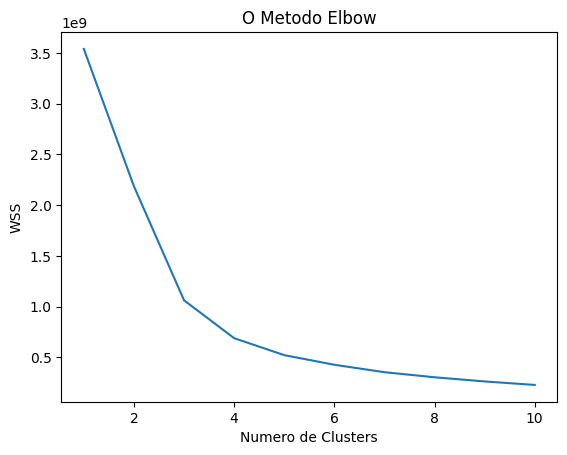

In [22]:
# checar o numero de clustes com o metodo do cotovelo
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, random_state=RANDOM_SEED)
    kmeans.fit(df_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS')
plt.show()


### Quantidade boa de cluster para o dataset inteiro (sem PCA): 3

In [23]:
# vamos separar o dataset em clientes que assinaram e que nao assinaram o produto
df_no = df_test[df_ohe['y'] == 0]
df_yes = df_test[df_ohe['y'] == 1]


C:\Users\hudso\AppData\Local\Temp\ipykernel_5524\2715124851.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no = df_test[df_ohe['y'] == 0]
C:\Users\hudso\AppData\Local\Temp\ipykernel_5524\2715124851.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_yes = df_test[df_ohe['y'] == 1]


In [24]:
# Análise dos clientes que não assinaram o produto
df_no.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,cluster
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,...,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.00000,7303.000000,7303.000000,7303.000000,7303.000000
mean,39.896755,221.752567,2.599754,982.411612,0.131864,0.242229,93.600625,-40.543188,3.803857,5175.705039,...,0.008353,0.189237,0.212926,0.211694,0.190333,0.19581,0.096673,0.888950,0.014378,1.621662
std,9.851153,207.356697,2.820890,127.277000,0.416059,1.488681,0.557353,4.422446,1.643100,64.528259,...,0.091017,0.391724,0.409404,0.408537,0.392590,0.39685,0.295532,0.314216,0.119050,0.518311
min,17.000000,2.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,94.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.405000,5099.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000
50%,38.000000,164.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5195.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,2.000000
75%,47.000000,281.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,2.000000
max,94.000000,3509.000000,42.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,2.000000


In [25]:
# Análise dos clientes que assinaram o produto
df_yes.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,cluster
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,...,935.000000,935.000000,935.00000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,41.252406,562.612834,2.127273,797.249198,0.493048,-1.213476,93.339442,-39.763636,2.145747,5097.275187,...,0.054545,0.188235,0.17754,0.219251,0.200000,0.214973,0.131551,0.678075,0.190374,1.056684
std,13.667998,387.718528,1.916304,399.717894,0.870468,1.632680,0.672973,6.104090,1.753207,86.630433,...,0.227212,0.391109,0.38233,0.413961,0.400214,0.411024,0.338183,0.467464,0.392807,0.678514
min,17.000000,80.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,255.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.851000,5017.500000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.000000,461.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.300000,1.266000,5099.100000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,49.000000,765.500000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.855000,5191.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
max,88.000000,2456.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [16]:
# usar  k-means para agrupar os dados
from sklearn.cluster import KMeans

# selecionar as colunas que serão usadas para agrupar, usar todas as colunas menos a coluna 'y'
X = df_ohe.drop('y', axis=1).values

# criar o modelo
kmeans = KMeans(n_clusters=4, random_state=RANDOM_SEED)

# treinar o modelo
kmeans.fit(X)

# prever os grupos
y_pred = kmeans.predict(X)
y_pred

# adicionar os grupos ao dataframe
df_ohe['cluster'] = y_pred
df_ohe



c:\Users\hudso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,1,0,2
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,1,0,2
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,1,0,2


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_ohe)

# Aplique o K-means aos dados normalizados
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

# Adicione os rótulos de cluster de volta ao DataFrame original
df_ohe['cluster'] = kmeans.labels_


c:\Users\hudso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# df_pca = pca.fit_transform(df_scaled)

# # Aplique o K-means aos dados após a redução de dimensionalidade
# kmeans = KMeans(n_clusters=2, random_state=42)
# kmeans.fit(df_pca)

# # Adicione os rótulos de cluster de volta ao DataFrame original
# df_ohe['cluster'] = kmeans.labels_


In [19]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Crie uma figura e subplots
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# # Plot 1: Variáveis Demográficas
# sns.scatterplot(x='age', y='marital_divorced', hue='cluster', data=df_ohe, ax=axes[0, 0])
# axes[0, 0].set_title('Idade vs Estado Civil')

# # Plot 2: Indicadores Econômicos
# sns.scatterplot(x='emp.var.rate', y='cons.price.idx', hue='cluster', data=df_ohe, ax=axes[0, 1])
# axes[0, 1].set_title('Variação do Emprego vs Índice de Preços ao Consumidor')

# # Plot 3: Resultados de Campanhas Anteriores
# sns.scatterplot(x='poutcome_failure', y='duration', hue='cluster', data=df_ohe, ax=axes[1, 0])
# axes[1, 0].set_title('Resultado da Campanha Anterior vs Duração')

# # Plot 4: Tipo de Trabalho e Duração do Contato
# sns.scatterplot(x='job_admin.', y='duration', hue='cluster', data=df_ohe, ax=axes[1, 1])
# axes[1, 1].set_title('Tipo de Trabalho vs Duração do Contato')

# # Ajuste o layout
# plt.tight_layout()
# plt.show()


In [20]:
sns.scatterplot(x='age', y='marital_divorced', hue='cluster', data=df_ohe)


NameError: name 'sns' is not defined

In [ ]:
# usar um modelo k-mens para agrupar os clientes em grupos de acordo com o seu perfil de investimento


In [ ]:
from sklearn.cluster import KMeans

# Selecionar as colunas relevantes para o clustering
X = df[['age', 'duration', 'campaign', 'euribor3m', 'nr.employed']]

# Inicializar o modelo K-means
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=300)

# Ajustar o modelo aos dados
kmeans.fit(X)

# Adicionar os rótulos de cluster de volta ao DataFrame original
df['cluster'] = kmeans.labels_


c:\Users\hudso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<AxesSubplot: xlabel='duration', ylabel='euribor3m'>

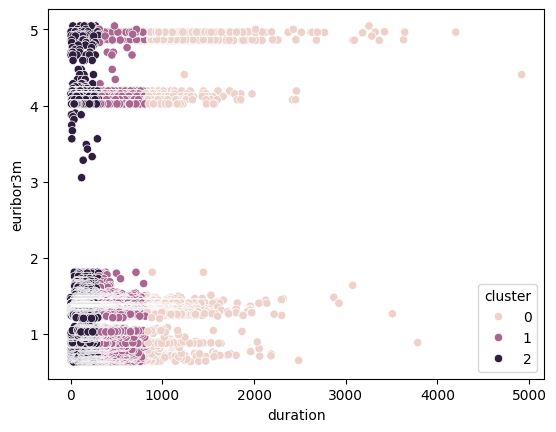

In [ ]:
# Exemplo de análise de clusters
import seaborn as sns

sns.scatterplot(x='duration', y='euribor3m', hue='cluster', data=df)
